<a href="https://colab.research.google.com/github/VanessaMeneses/git-practice/blob/main/EVALUACION_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Valores faltantes por columna:
Education                     0
JoiningYear                  36
City                          0
PaymentTier                  42
Age                          27
Gender                        0
EverBenched                   0
ExperienceInCurrentDomain    30
LeaveOrNot                    0
dtype: int64


<ipython-input-2-185186929547>:31: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-2-185186929547>:32: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-2-185186929547>:34: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


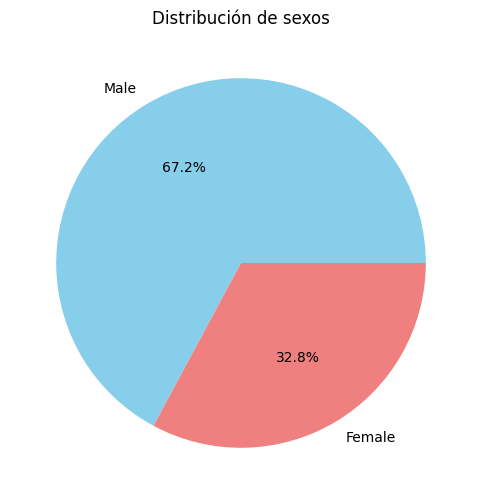

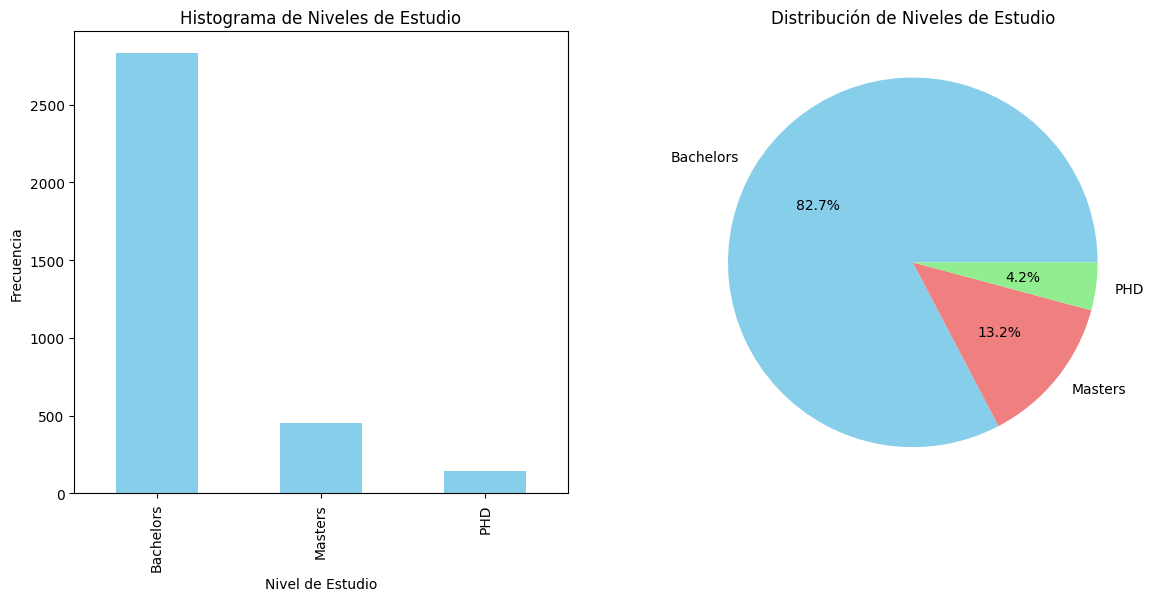

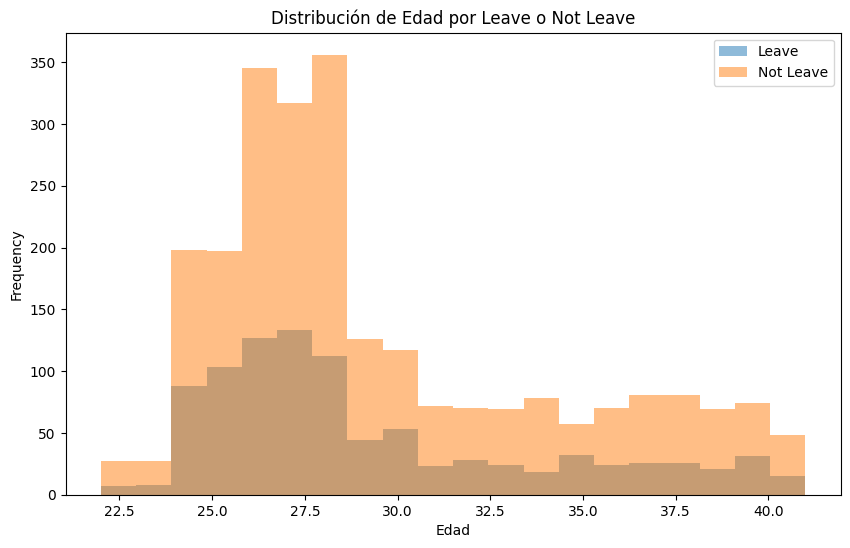

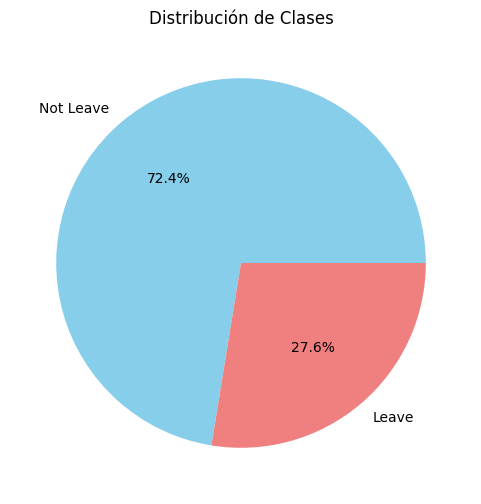

RandomForest sin cambios:
Accuracy en el conjunto de entrenamiento: 0.9261965655827549
Accuracy en el conjunto de test: 0.8350364963503649


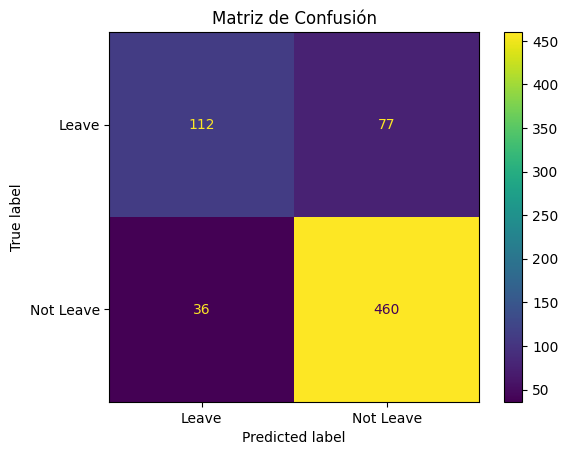


RandomForest con class_weight="balanced":
Accuracy en el conjunto de entrenamiento: 0.9199853854585313
Accuracy en el conjunto de test: 0.7985401459854015


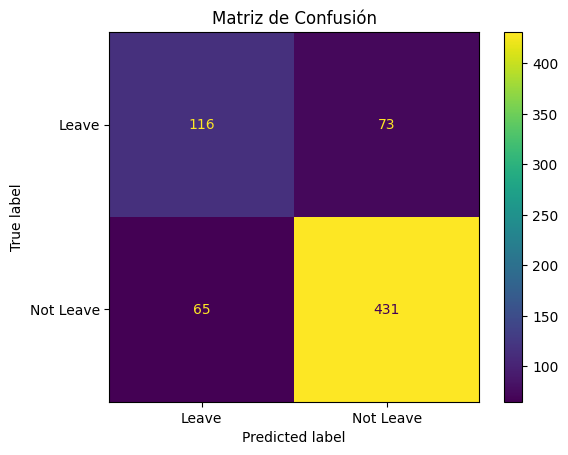

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Preprocesamiento de Datos
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('DATOS.csv')

# Verificar valores faltantes
print("Valores faltantes por columna:")
print(df.isnull().sum())

# Convertir la columna 'LeaveOrNot' a etiquetas categóricas
df['LeaveOrNot'] = df['LeaveOrNot'].map({0: 'Not Leave', 1: 'Leave'})

# Eliminar filas con valores faltantes en las columnas ExperienceInCurrentDomain y JoiningYear
df.dropna(subset=['ExperienceInCurrentDomain', 'JoiningYear'], inplace=True)

# Imputar datos faltantes de la columna Age con la media
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Imputar datos faltantes de la columna PaymentTier con la moda
df['PaymentTier'].fillna(df['PaymentTier'].mode()[0], inplace=True)

# Eliminar registros con valores atípicos basándose en un análisis de IQR para columnas numéricas
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Análisis Exploratorio de Datos (EDA)
# Graficar la distribución de los sexos con un gráfico de torta
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribución de sexos')
plt.ylabel('')
plt.show()

# Graficar la Distribución de niveles de estudio de los empleados
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df['Education'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Histograma de Niveles de Estudio')
axes[0].set_xlabel('Nivel de Estudio')
axes[0].set_ylabel('Frecuencia')

df['Education'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
axes[1].set_title('Distribución de Niveles de Estudio')
axes[1].set_ylabel('')

plt.show()

# Responder la pregunta usando un histograma: ¿Son los jóvenes más propensos a tomar licencias?
plt.figure(figsize=(10, 6))
df[df['LeaveOrNot'] == 'Leave']['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Leave')
df[df['LeaveOrNot'] == 'Not Leave']['Age'].plot(kind='hist', bins=20, alpha=0.5, label='Not Leave')
plt.title('Distribución de Edad por Leave o Not Leave')
plt.xlabel('Edad')
plt.legend()
plt.show()

# Graficar la distribución de clases y responder: ¿Está el dataset balanceado?
plt.figure(figsize=(6, 6))
df['LeaveOrNot'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribución de Clases')
plt.ylabel('')
plt.show()

# Modelado de Datos
# Preparar los datos para el modelado
X = df.drop(columns=['LeaveOrNot'])
y = df['LeaveOrNot']
X = pd.get_dummies(X)

# Partición estratificada del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Entrenar dos RandomForests
rf_normal = RandomForestClassifier(random_state=42)
rf_normal.fit(X_train, y_train)

rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

# Calcular métricas de desempeño para ambos modelos
def mostrar_metricas(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Accuracy en el conjunto de entrenamiento:", accuracy_score(y_train, y_train_pred))
    print("Accuracy en el conjunto de test:", accuracy_score(y_test, y_test_pred))


    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_pred), display_labels=rf_balanced.classes_)
    disp.plot()
    plt.title('Matriz de Confusión')
    plt.show()

# Mostrar métricas para ambos modelos
print("RandomForest sin cambios:")
mostrar_metricas(rf_normal, X_train, y_train, X_test, y_test)

print("\nRandomForest con class_weight=\"balanced\":")
mostrar_metricas(rf_balanced, X_train, y_train, X_test, y_test)